***House Price Prediction****

Task 1: Basic Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math as m


In [2]:
# Read excel file into a pandas DataFrame
data=pd.read_csv(r"HousePrediction.csv")

In [3]:
# Display all the columns of DataFrame
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [5]:
#Display all the columns of DataFrame
data.head(100)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [6]:
# Give column insights
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


Task 2: Data Cleaning and Analysis

In [7]:
# Q1) Checking for Missing Values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [8]:
# Handling Missing Values

for i in data.columns:
    if data[i].dtype=='object':
        m=data[i].mode()[0] # replace with mode (most frequent value)
        data[i]=data[i].fillna(m)
    else:
        me=data[i].mean()
        data[i]=data[i].fillna(me) # replace with mean value

# Verifying if missing values are handled
data.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [9]:
# Q3) Calculate Mean Sales Price for Missing/Present
mean_price=data['SalePrice'].mean()
print("Mean Sales Price is:",round(mean_price),2)

Mean Sales Price is: 180921 2


In [36]:
# Q4) Count of Numerical Features excluding 'Id'

numerical_columns=((data.select_dtypes(exclude='object')).drop(columns=['Id']))
numerical_columns.count()

MSSubClass      2919
LotArea         2919
OverallCond     2919
YearBuilt       2919
YearRemodAdd    2919
BsmtFinSF2      2919
TotalBsmtSF     2919
SalePrice       2919
dtype: int64

In [11]:
#Q5 Print the First Five Rows of Numerical Values
numerical_columns.head()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


In [18]:
# Q8 Relationship Between Continuous Variables and Sales Price
data[['SalePrice','LotArea','TotalBsmtSF']].corr()



,SalePrice,LotArea,TotalBsmtSF
SalePrice,1.000000,0.236105,0.431912
LotArea,0.236105,1.000000,0.254125
TotalBsmtSF,0.431912,0.254125,1.000000


<Figure size 2000x2000 with 0 Axes>

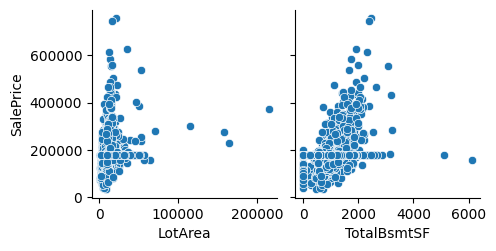

In [19]:
plt.figure(figsize=(20,20))
sns.pairplot(data,x_vars=['LotArea','TotalBsmtSF'],y_vars='SalePrice')
plt.show()

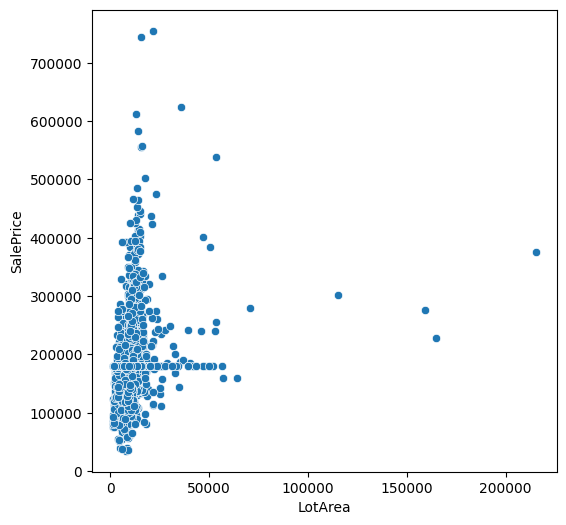

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='LotArea',y='SalePrice',data=data)
plt.show()

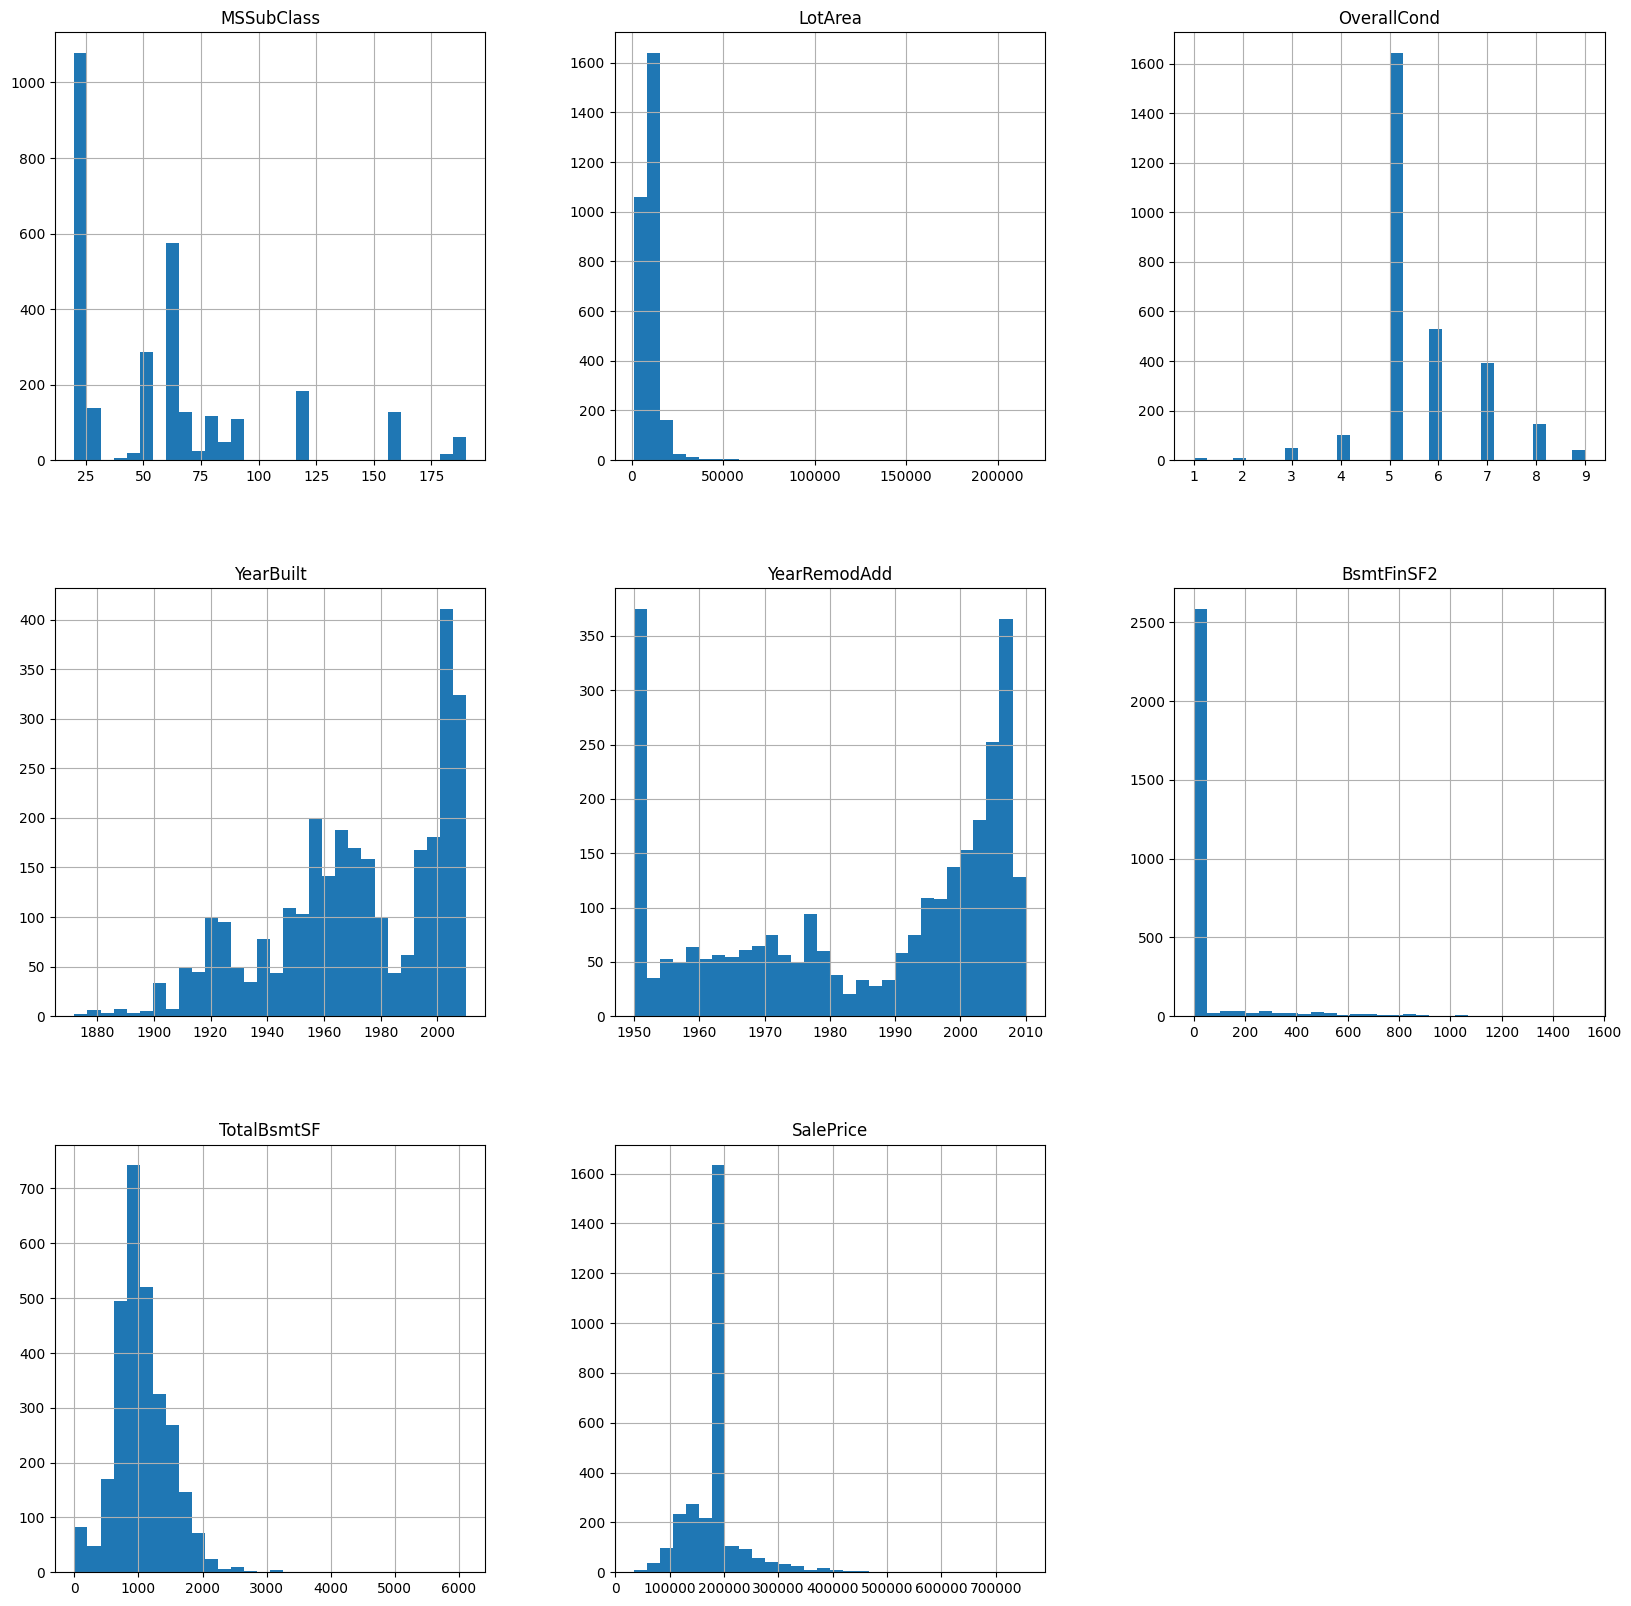

In [41]:
# Q9) Histogram Analysis for Continuous Variables
numerical_columns.hist(bins=30,figsize=(20,20))
plt.show()


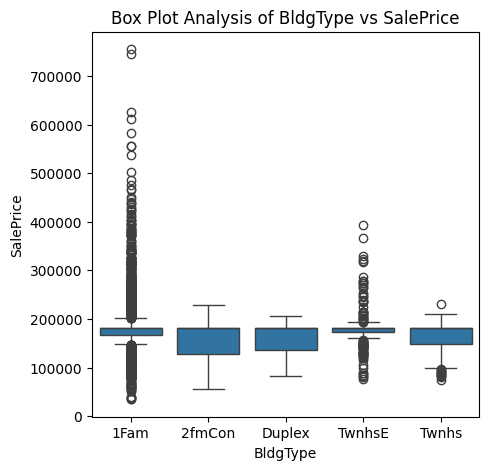

In [72]:
# Box Plot Analysis for Continuous vs Categorical Variables
plt.figure(figsize=(5,5))
sns.boxplot(x='BldgType',y='SalePrice',data=data)
plt.title('Box Plot Analysis of BldgType vs SalePrice')
plt.show()

In [110]:
# Grouping by SalePrice
g=data.groupby(['BldgType','MSZoning'])['SalePrice'].sum()
df_g=pd.DataFrame(g)
df_g


SalePrice
BldgType MSZoning              
1Fam     C (all)   2.963356e+06
         FV        1.621166e+07
         RH        1.539698e+06
         RL        3.771822e+08
         RM        4.674496e+07
2fmCon   C (all)   4.957424e+05
         RH        7.218424e+05
         RL        4.687497e+06
         RM        3.684876e+06
Duplex   RH        6.149212e+05
         RL        1.455747e+07
         RM        2.084248e+06
Twnhs    FV        3.317012e+06
         RL        4.321397e+06
         RM        7.794615e+06
TwnhsE   FV        7.770415e+06
         RH        1.037685e+06
         RL        2.136806e+07
         RM        1.101130e+07